In [50]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
import pandas as pd
import zipfile
import os

dataset_zip_path = '/content/drive/MyDrive/data set sentiment /sentiment+labelled+sentences.zip'
extraction_directory = '/content/extracted_sentiment_data'

# Check if already extracted
if not os.path.exists(extraction_directory):
    with zipfile.ZipFile(dataset_zip_path, 'r') as zip_ref:
        zip_ref.extractall(extraction_directory)
    print(f"Extracted {dataset_zip_path} to {extraction_directory}")
else:
    print(f"{extraction_directory} already exists. Skipping extraction.")

# Count folders after extraction
folder_count = len([f for f in os.listdir(extraction_directory) if os.path.isdir(os.path.join(extraction_directory, f))])
print(f"Number of folders in {extraction_directory}: {folder_count}")

/content/extracted_sentiment_data already exists. Skipping extraction.
Number of folders in /content/extracted_sentiment_data: 2


In [52]:
# List the folder names
folder_names = [f for f in os.listdir(extraction_directory) if os.path.isdir(os.path.join(extraction_directory, f))]
print(f"Folder names in {extraction_directory}: {folder_names}")

Folder names in /content/extracted_sentiment_data: ['sentiment labelled sentences', '__MACOSX']


In [53]:
import os

target_directory = '/content/extracted_sentiment_data/sentiment labelled sentences'

# Check if the directory exists
if os.path.exists(target_directory):
    file_names = [f for f in os.listdir(target_directory) if os.path.isfile(os.path.join(target_directory, f))]
    print(f"File names in {target_directory}: {file_names}")
else:
    print(f"Directory '{target_directory}' not found.")

File names in /content/extracted_sentiment_data/sentiment labelled sentences: ['yelp_labelled.txt', 'imdb_labelled.txt', 'readme.txt', '.DS_Store', 'amazon_cells_labelled.txt']


In [54]:
import pandas as pd

# Assuming the file is in the extracted directory
file_path = '/content/extracted_sentiment_data/sentiment labelled sentences/amazon_cells_labelled.txt'

try:
    # Try reading with pandas, handling potential encoding issues
    df = pd.read_csv(file_path, sep='\t', header=None, encoding='latin-1', names=['Review', 'Sentiment'])
    print(df.head())
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
except pd.errors.ParserError:
    print(f"Error: Could not parse the file at {file_path}. Check its format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

                                              Review  Sentiment
0  So there is no way for me to plug it in here i...          0
1                        Good case, Excellent value.          1
2                             Great for the jawbone.          1
3  Tied to charger for conversations lasting more...          0
4                                  The mic is great.          1


In [55]:
# Example: Display some statistics about the 'Sentiment' column
print(df['Sentiment'].value_counts())

# Example: Display the first 10 reviews
print(df['Review'].head(10))

# Example: Calculate the average length of reviews
df['ReviewLength'] = df['Review'].str.len()
print(df['ReviewLength'].mean())

Sentiment
0    500
1    500
Name: count, dtype: int64
0    So there is no way for me to plug it in here i...
1                          Good case, Excellent value.
2                               Great for the jawbone.
3    Tied to charger for conversations lasting more...
4                                    The mic is great.
5    I have to jiggle the plug to get it to line up...
6    If you have several dozen or several hundred c...
7          If you are Razr owner...you must have this!
8                  Needless to say, I wasted my money.
9                     What a waste of money and time!.
Name: Review, dtype: object
55.226


In [63]:
# Example: Group by sentiment and calculate the average review length
sentiment_avg_length = df.groupby('Sentiment')['ReviewLength'].mean()
print(sentiment_avg_length)

# Example: Find the longest review for each sentiment
longest_reviews = df.groupby('Sentiment').apply(lambda x: x.loc[x['ReviewLength'].idxmax()])
print(longest_reviews[['Review', 'ReviewLength']])

# Example: Filter reviews based on length (e.g., reviews longer than 100 characters)
long_reviews = df[df['ReviewLength'] > 100]
print(long_reviews.head())

# Example: Create a new column indicating whether a review is positive or negative
df['SentimentLabel'] = df['Sentiment'].map({0: 'Negative', 1: 'Positive'})
print(df.head())

Sentiment
0    56.824
1    53.628
Name: ReviewLength, dtype: float64
                                                      Review  ReviewLength
Sentiment                                                                 
0          The one big drawback of the MP3 player is that...           149
1          Best I've found so far .... I've tried 2 other...           148
                                               Review  Sentiment  \
6   If you have several dozen or several hundred c...          0   
12  If the two were seperated by a mere 5+ ft I st...          0   
34  Car charger as well as AC charger are included...          1   
35  You need at least 3 mins to get to your phone ...          0   
52  A usable keyboard actually turns a PDA into a ...          1   

    ReviewLength SentimentLabel  
6            111       Negative  
12           114       Negative  
34           104       Positive  
35           115       Negative  
52           102       Positive  
                  

<ipython-input-63-c97bc9dcd50a>:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  longest_reviews = df.groupby('Sentiment').apply(lambda x: x.loc[x['ReviewLength'].idxmax()])


In [64]:
# prompt: next

# Example: Create a new column indicating whether a review is positive or negative
df['SentimentLabel'] = df['Sentiment'].map({0: 'Negative', 1: 'Positive'})
print(df.head())

                                              Review  Sentiment  ReviewLength  \
0  So there is no way for me to plug it in here i...          0            82   
1                        Good case, Excellent value.          1            27   
2                             Great for the jawbone.          1            22   
3  Tied to charger for conversations lasting more...          0            79   
4                                  The mic is great.          1            17   

  SentimentLabel  
0       Negative  
1       Positive  
2       Positive  
3       Negative  
4       Positive  


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df['Review'], df['Sentiment'], test_size=0.2, random_state=42
)

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.77      0.87      0.82        93
           1       0.87      0.78      0.82       107

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.83      0.82      0.82       200



In [56]:
import nltk
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd # Import pandas

nltk.download('stopwords')

def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()
    words = text.split()
    words = [word for word in words if word not in stopwords.words('english')]  # Remove stop words
    return ' '.join(words)  # Join the words back into a string

sentiment_df = pd.read_csv('/content/extracted_sentiment_data/sentiment labelled sentences/amazon_cells_labelled.txt',
                           delimiter='\t', header=None, names=['text_message', 'sentiment_label']) # Load the data into sentiment_df


# Apply preprocessing to the 'text_message' column
sentiment_df['processed_text'] = sentiment_df['text_message'].apply(preprocess_text)

# Create TF-IDF features
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(sentiment_df['processed_text'])
y = sentiment_df['sentiment_label']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create SVM classifiers with different kernels
linear_svm = SVC(kernel='linear')
rbf_svm = SVC(kernel='rbf')
poly_svm = SVC(kernel='poly')

# Train the classifiers
linear_svm.fit(X_train, y_train)
rbf_svm.fit(X_train, y_train)
poly_svm.fit(X_train, y_train)

# Make predictions on the test set
linear_predictions = linear_svm.predict(X_test)
rbf_predictions = rbf_svm.predict(X_test)
poly_predictions = poly_svm.predict(X_test)

# Evaluate the performance using accuracy
linear_accuracy = accuracy_score(y_test, linear_predictions)
rbf_accuracy = accuracy_score(y_test, rbf_predictions)
poly_accuracy = accuracy_score(y_test, poly_predictions)

print(f"Linear SVM Accuracy: {linear_accuracy}")
print(f"RBF SVM Accuracy: {rbf_accuracy}")
print(f"Polynomial SVM Accuracy: {poly_accuracy}")

Linear SVM Accuracy: 0.81
RBF SVM Accuracy: 0.8
Polynomial SVM Accuracy: 0.725


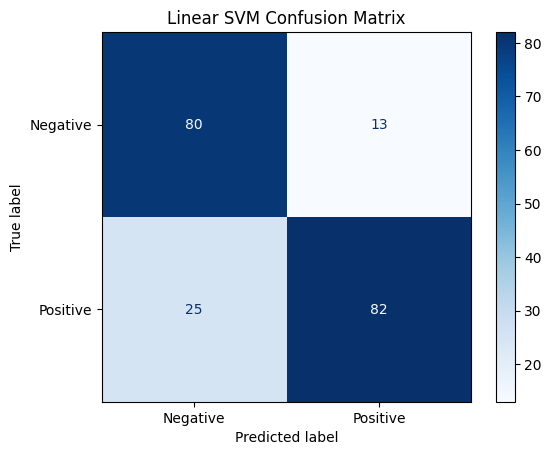

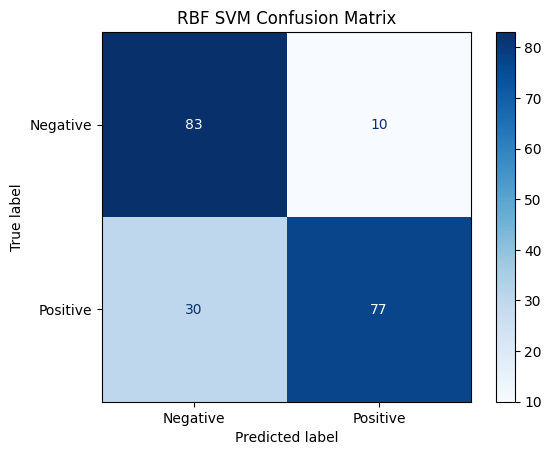

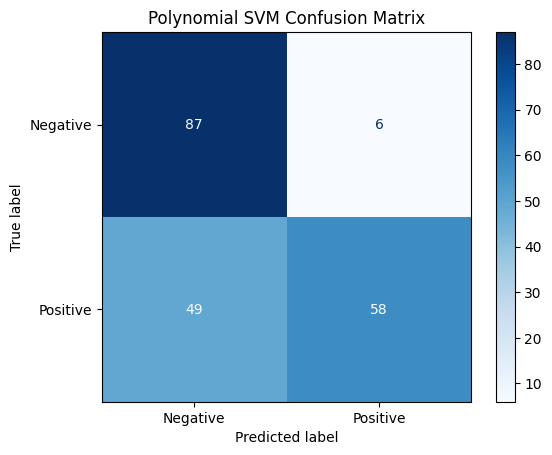

In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# Generate confusion matrices for each kernel
cm_linear = confusion_matrix(y_test, linear_predictions)
cm_rbf = confusion_matrix(y_test, rbf_predictions)
cm_poly = confusion_matrix(y_test, poly_predictions)

# Display the confusion matrices
disp_linear = ConfusionMatrixDisplay(confusion_matrix=cm_linear, display_labels=['Negative', 'Positive'])
disp_rbf = ConfusionMatrixDisplay(confusion_matrix=cm_rbf, display_labels=['Negative', 'Positive'])
disp_poly = ConfusionMatrixDisplay(confusion_matrix=cm_poly, display_labels=['Negative', 'Positive'])

disp_linear.plot(cmap=plt.cm.Blues)
plt.title("Linear SVM Confusion Matrix")
plt.show()

disp_rbf.plot(cmap=plt.cm.Blues)
plt.title("RBF SVM Confusion Matrix")
plt.show()

disp_poly.plot(cmap=plt.cm.Blues)
plt.title("Polynomial SVM Confusion Matrix")
plt.show()

In [59]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grids for each kernel
param_grid_rbf = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}
param_grid_poly = {'C': [0.1, 1, 10], 'degree': [2, 3, 4]}

# Create GridSearchCV objects for each kernel
grid_rbf = GridSearchCV(SVC(kernel='rbf'), param_grid_rbf, cv=5)
grid_poly = GridSearchCV(SVC(kernel='poly'), param_grid_poly, cv=5)

# Fit the GridSearchCV objects to the training data
grid_rbf.fit(X_train, y_train)
grid_poly.fit(X_train, y_train)

# Get the best parameters and best scores
print("Best parameters for RBF kernel:", grid_rbf.best_params_)
print("Best score for RBF kernel:", grid_rbf.best_score_)
print("Best parameters for Polynomial kernel:", grid_poly.best_params_)
print("Best score for Polynomial kernel:", grid_poly.best_score_)

# Evaluate the best models on the test set
rbf_best_predictions = grid_rbf.predict(X_test)
poly_best_predictions = grid_poly.predict(X_test)
rbf_best_accuracy = accuracy_score(y_test, rbf_best_predictions)
poly_best_accuracy = accuracy_score(y_test, poly_best_predictions)

print(f"RBF SVM Accuracy (with best parameters): {rbf_best_accuracy}")
print(f"Polynomial SVM Accuracy (with best parameters): {poly_best_accuracy}")

Best parameters for RBF kernel: {'C': 10, 'gamma': 1}
Best score for RBF kernel: 0.8074999999999999
Best parameters for Polynomial kernel: {'C': 10, 'degree': 2}
Best score for Polynomial kernel: 0.7875
RBF SVM Accuracy (with best parameters): 0.79
Polynomial SVM Accuracy (with best parameters): 0.795


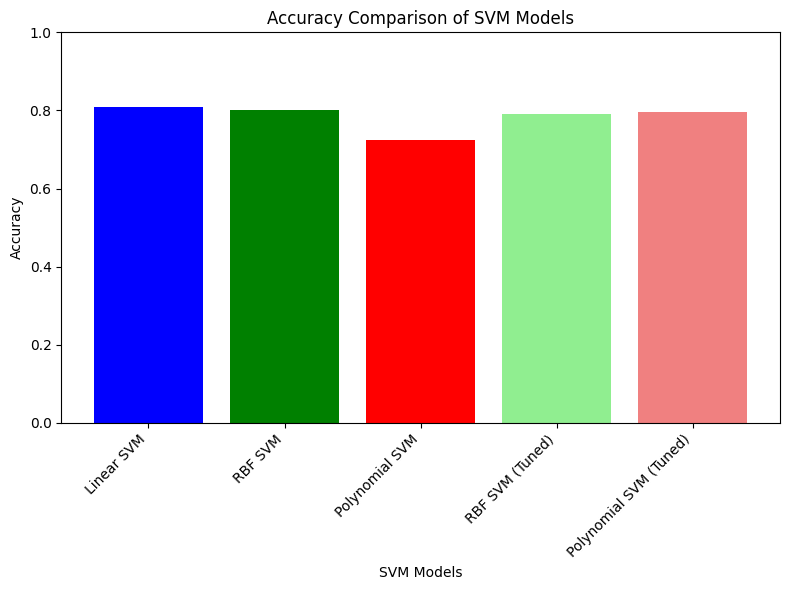

In [60]:
import matplotlib.pyplot as plt

# Accuracy scores for each model
models = ['Linear SVM', 'RBF SVM', 'Polynomial SVM', 'RBF SVM (Tuned)', 'Polynomial SVM (Tuned)']
accuracies = [linear_accuracy, rbf_accuracy, poly_accuracy, rbf_best_accuracy, poly_best_accuracy]

# Create a bar chart
plt.figure(figsize=(8, 6))  # Set figure size
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'lightgreen', 'lightcoral'])
plt.xlabel("SVM Models")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of SVM Models")
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [61]:
# Sample texts for testing
sample_texts = [
    "This is an amazing product! I highly recommend it.",
    "I'm very disappointed with this purchase. It's terrible.",
    "The product is okay, but it could be better.",
    "I love this! It's exactly what I was looking for.",
    "Not sure if I like it yet. It's kind of average."
]

# Preprocess and predict for each sample text
for text in sample_texts:
    processed_sample = preprocess_text(text)
    sample_vector = vectorizer.transform([processed_sample])
    prediction = linear_svm.predict(sample_vector)[0]  # Assuming linear_svm is your best model

    print(f"Text: {text}")
    if prediction == 1:
        print("Sentiment: Positive")
    else:
        print("Sentiment: Negative")
    print("-" * 20)

Text: This is an amazing product! I highly recommend it.
Sentiment: Positive
--------------------
Text: I'm very disappointed with this purchase. It's terrible.
Sentiment: Negative
--------------------
Text: The product is okay, but it could be better.
Sentiment: Negative
--------------------
Text: I love this! It's exactly what I was looking for.
Sentiment: Positive
--------------------
Text: Not sure if I like it yet. It's kind of average.
Sentiment: Positive
--------------------
